## Import all the libraries

In [76]:
# Imaplib is for reading mails from gmail.
# Email library handles and parses email messages.
import imaplib
import email
import getpass
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Login to gmail account

In [65]:
username =  input("Enter the email address: ")

Enter the email address: bm20btech11001@iith.ac.in


In [66]:
#Get password
import getpass
password = getpass.getpass("Enter password: ")

Enter password: ········


In [67]:
mail = imaplib.IMAP4_SSL('imap.gmail.com')

In [68]:
mail.login(username, password)

('OK', [b'bm20btech11001@iith.ac.in authenticated (Success)'])

## Extracting mail count from each folder/mail label

In [69]:
print(mail.list())

('OK', [b'(\\HasChildren) "/" "Academics"', b'(\\HasNoChildren) "/" "Academics/Exams"', b'(\\HasNoChildren) "/" "Academics/Grade cards"', b'(\\HasNoChildren) "/" "Announcements"', b'(\\HasNoChildren) "/" "Director"', b'(\\HasNoChildren) "/" "Found and Lost"', b'(\\HasChildren) "/" "General"', b'(\\HasNoChildren) "/" "General/Cab Sharing"', b'(\\HasNoChildren) "/" "General/Mess swap"', b'(\\HasNoChildren) "/" "General/Surveys"', b'(\\HasNoChildren) "/" "Google classroom"', b'(\\HasNoChildren) "/" "Hostel Related"', b'(\\HasNoChildren) "/" "INBOX"', b'(\\HasNoChildren) "/" "Industry Lecture series"', b'(\\HasNoChildren) "/" "Interns Related"', b'(\\HasNoChildren) "/" "New joining"', b'(\\HasNoChildren) "/" "Office of Career services"', b'(\\HasNoChildren) "/" "Seminars and Colloquium"', b'(\\HasNoChildren) "/" "Viva voice"', b'(\\HasChildren \\Noselect) "/" "[Gmail]"', b'(\\All \\HasNoChildren) "/" "[Gmail]/All Mail"', b'(\\Drafts \\HasNoChildren) "/" "[Gmail]/Drafts"', b'(\\HasNoChildre

In [70]:
# Select inbox
labels = mail.list()
print(labels[1][3])
mail.select("inbox")

b'(\\HasNoChildren) "/" "Announcements"'


('OK', [b'14108'])

In [82]:
# Get mail count from various folders/labels
response, academics = mail.select("Academics")
response, clubs = mail.select("clubs")
response, Director = mail.select("Director")
response, Found_Lost = mail.select('"Found and Lost"')
response, General = mail.select("General")
response, google_classroom = mail.select('"Google classroom"')
response, hostel = mail.select('"Hostel Related"')
response, industry_lecture = mail.select('"Industry Lecture series"')
response, interns = mail.select('"Interns Related"')
response, mess = mail.select('"mess"')
response, new_joining = mail.select('"New joining"')
response, ocs = mail.select('"Office of Career services"')
response, seminars = mail.select('"Seminars and Colloquium"')
response, sports = mail.select('"sports"')
response, viva_voice = mail.select('"Viva voice"')

dict_labels = {
    "academics" : academics,
    "clubs" : clubs,
    "Director" : Director,
    "Found_Lost" : Found_Lost,
    "General" : General,
    "google_classroom": google_classroom,
    "hostel" : hostel,
    "industry_lecture" : industry_lecture,
    "interns" : interns,
    "mess" : mess,
    "new_joining" : new_joining,
    "ocs" : ocs,
    "seminars" : seminars,
    "sports" : sports,
    "viva_voice" : viva_voice
}

In [114]:
labels = []
label_names = []
for label in dict_labels:
    decoded = int(dict_labels[label][0].decode("utf-8"))
    labels.append(decoded)
    label_names.append(label)
labels_array = np.array(labels)
print(len(labels_array))

15


In [115]:
label_names

['academics',
 'clubs',
 'Director',
 'Found_Lost',
 'General',
 'google_classroom',
 'hostel',
 'industry_lecture',
 'interns',
 'mess',
 'new_joining',
 'ocs',
 'seminars',
 'sports',
 'viva_voice']

## Piechart of distribution of mails from every label/folder

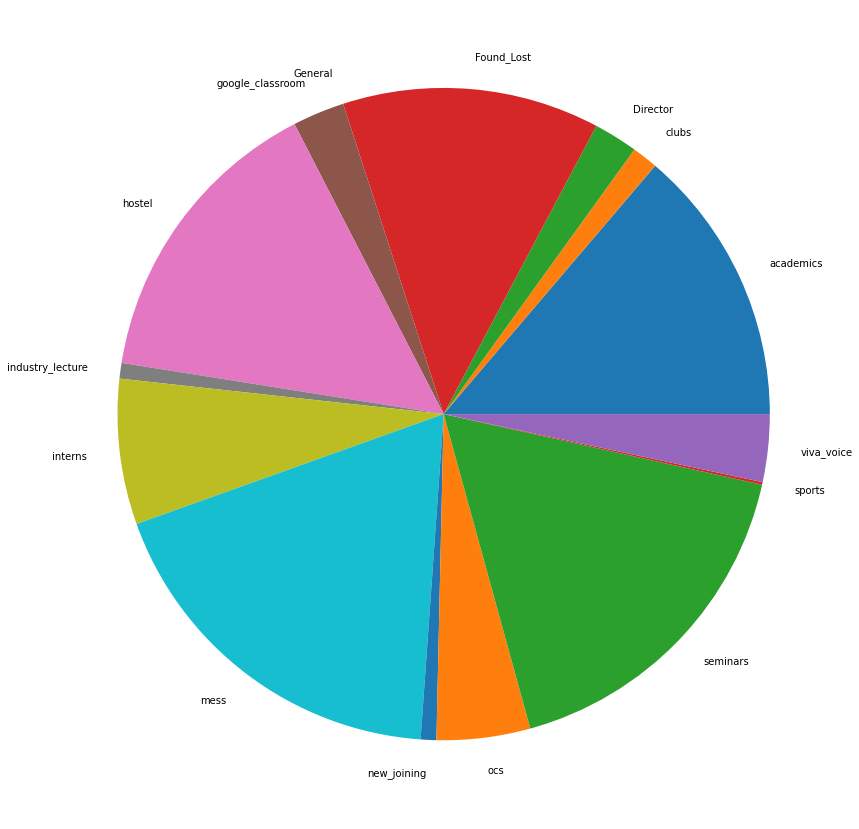

In [120]:
plt.figure(figsize=(15, 15))
plt.pie(labels_array, labels = label_names);